# **Feature Extraction Technique: PCA**

- PCA is a technique which can transform higher dimensional data to lower dimensional data while keeping the essence of the data.

- Creating new set of features from existing ones in such a way that more variance can be captured from the higher dimension.

- Helps in reducing curse of dimensionality.

- Best possible lower dimension so that essence of data in higher dimension can be captured.

#### Core Benefits:
 - Higher to lower (in terms of dimension), so because of this execution of algorithm becomes faster.
 - We can visualize by lowering dimensions to 2D or 3D.

### Difference between Feature Selection and Feature Extraction?

- Feature Selection: It is helpful when we have features with different variance, so we can easily select those features which show higher varinace.

- Feature Extraction: Sometime we come across a scenario where in data set all features show approximately same varinace on that time we can not go with feature variance. On that time we have to use feature extraction.

### Geometric Intution

- PCA: Will find a new set of axis by rotating existing coordinates, and then transform data according to that Principal Component where **Variance** is more.


### Why Variance is Important?

- Spread is not varinace, Spread is directly proportional to variance. We do not use  MAD(Spread) directly in PCA because it is not differentiable at 0 (origin). So it will not converge in time of optimization.

- That's why variance is important. When we brings data points from higher to lower dimension, Relationship between data points do not get disorted, to maintain this we have to maximize the variance.

- End goal to maximize the variance.


### Eigen Decomposition of covarinace matrix

- Matrices are linear transformation: When we apply matrix transformation over any coordinates system, then it transforms coordinates systems. Vectors direction and magnitude both changes. Basically vectors get knocked off from their span.

- With Identity matrix, No changes happen.

- Matrices are basically linear transformation that bring changes on coordinate system.


#### Eigen Vector
 - Special vector, only magnitude changes. Direction remain same, when linear transformation applied.
 - In 2D space ---> 2 Eigen Vector
 - In 3D space ---> 3 Eigen vector
 
 
#### Eigen Value
 - How much eigen vector is stretching or srinking. Factor by which eigen vector magnitude changes.
 
 
##### The largest eigen vector of the covariance matrix always points into the direction of the largest varinace of the data, and the magnitude of this vector equals the corrsponding eigen value.


### Steps:
 - Make data mean centering (Bring data to center, not mandatory but if done then get good result)
 
 - Find covariance matrix.
 
 - Find the eigen value and eigen vector for the covariance matrix.
 
 - Select those eigen vectors which have corresponding greater eigen value.
 
 - Eigen vectors are only principal components.
 
 - After getting principal components, we have to bring actual data points from higher dimension to lower dimension.

In [2]:
import numpy as np
import pandas as pd

np.random.seed(23)

In [3]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

In [4]:
df.head()

feature1  feature2  feature3  target
0  0.666988  0.025813 -0.777619       1
1  0.948634  0.701672 -1.051082       1
2 -0.367548 -1.137460 -1.322148       1
3  1.772258 -0.347459  0.670140       1
4  0.322272  0.060343 -1.043450       1

In [5]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = df.append(df1,ignore_index=True)

df = df.sample(40)

In [6]:
df.head()

feature1  feature2  feature3  target
2  -0.367548 -1.137460 -1.322148       1
34  0.177061 -0.598109  1.226512       0
14  0.420623  0.411620 -0.071324       1
11  1.968435 -0.547788 -0.679418       1
12 -2.506230  0.146960  0.606195       1

In [7]:
df.shape

(40, 4)

In [8]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [9]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [10]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [11]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [13]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [15]:
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


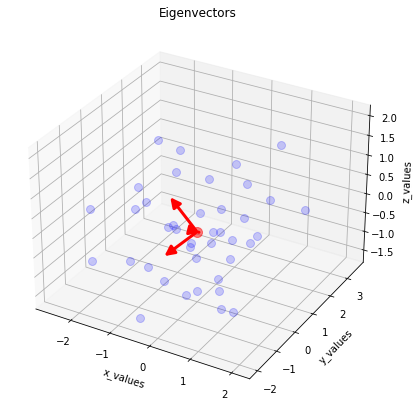

In [17]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], \
                [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
    
    
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')

plt.show()

In [18]:
# Selecting first two eigen vectors (with larger eigen values)
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [19]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)

In [20]:
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

PC1       PC2  target
0  0.599433  1.795862       1
1  1.056919 -0.212737       0
2 -0.271876  0.498222       1
3 -0.621586  0.023110       1
4  1.567286  1.730967       1

In [21]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()